In [5]:
pip install pandas
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import nltk
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (<ipython-input-5-a6d404c77ed1>, line 1)

In [20]:
df = pd.read_csv('flipkart.csv')
X = df.iloc[:, [3]].values
Y = df.iloc[:, [4]].values
df['category_id'] = df['Output'].factorize()[0]
category_id_df = df[['Output', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Output']].values)
df = df.dropna()
df

,product_name,image,description,brand,Output,category_id
0,Alisha Solid Women's Cycling Shorts,"[""http://img5a.flixcart.com/image/short/u/4/a/...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,0
1,FabHomeDecor Fabric Double Sofa Bed,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture,1
2,AW Bellies,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear,2
3,Alisha Solid Women's Cycling Shorts,"[""http://img5a.flixcart.com/image/short/6/2/h/...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,0
4,Sicons All Purpose Arnica Dog Shampoo,"[""http://img5a.flixcart.com/image/pet-shampoo/...",Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies,3
5,Alisha Solid Women's Cycling Shorts,"[""http://img6a.flixcart.com/image/short/p/j/z/...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,0
6,FabHomeDecor Fabric Double Sofa Bed,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture,1
7,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""http://img6a.flixcart.com/image/shoe/b/p/n/p...","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,Footwear,2
8,Alisha Solid Women's Cycling Shorts,"[""http://img5a.flixcart.com/image/short/5/z/c/...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,0
9,Ladela Bellies,"[""http://img5a.flixcart.com/image/shoe/s/g/m/b...",Key Features of Ladela Bellies Brand: LADELA C...,Ladela,Footwear,2


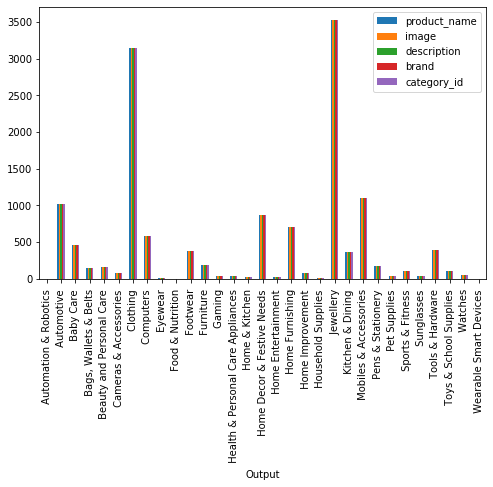

In [19]:
#df.sample(10, random_state=0)
from matplotlib.pyplot import figure
x = df.groupby('Output').count()
ax = x.plot(kind = "bar",figsize=(8,5))
ax.figure.savefig('demo-file.png',dpi=600, bbox_inches='tight')
plt.show()

In [14]:
plt.show()

In [ ]:
df.groupby('product_name').Output.count().plot.bar(ylim=0)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.description).toarray()
labels = df.category_id
features.shape

(13812, 22575)

In [16]:

from sklearn.feature_selection import chi2

N = 3
for Output, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Output))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


# ' Automation & Robotics ':
  . Most correlated unigrams:
       . smart
       . door
       . lock
  . Most correlated bigrams:
       . best prices
       . delivery genuine
       . prices free
# ' Automotive ':
  . Most correlated unigrams:
       . allure
       . mat
       . car
  . Most correlated bigrams:
       . auto cm
       . allure auto
       . car mat
# ' Baby Care ':
  . Most correlated unigrams:
       . sticker
       . vinyl
       . baby
  . Most correlated bigrams:
       . stickers sticker
       . vinyl stickers
       . walldesign small
# ' Bags, Wallets & Belts ':
  . Most correlated unigrams:
       . compartments
       . zip
       . bag
  . Most correlated bigrams:
       . closure zip
       . color code
       . shoulder bag
# ' Beauty and Personal Care ':
  . Most correlated unigrams:
       . organic
       . quantity
       . traits
  . Most correlated bigrams:
       . organic type
       . traits quantity
       . general traits
# ' Cameras & Acc

In [1]:

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt


SAMPLE_SIZE = int(len(features) * 0.1)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
for product_name, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()


NameError: name 'features' is not defined

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.description).toarray()
labels = df.category_id

In [21]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    #MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to

model_name
LogisticRegression    0.915582
Name: accuracy, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0, random_state=0)
model.fit(X_train, y_train)
#y_pred_proba = model.predict_proba(X_test)
#y_pred = model.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:


class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(800, 600)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.lineEdit = QtWidgets.QLineEdit(self.centralwidget)
        self.lineEdit.setObjectName("lineEdit")
        self.lineEdit.setGeometry(QtCore.QRect(260, 240, 281, 41))
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(325, 190, 201, 31))
        self.label.setObjectName("label")
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 800, 26))
        self.menubar.setObjectName("menubar")
        self.menuProduct_Classification = QtWidgets.QMenu(self.menubar)
        self.menuProduct_Classification.setObjectName("menuProduct_Classification")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)
        self.menubar.addAction(self.menuProduct_Classification.menuAction())
        self.pushButton = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton.setGeometry(QtCore.QRect(330, 320, 141, 61))
        self.pushButton.setObjectName("pushButton")
        self.pushButton.clicked.connect(self.submit)
       

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.pushButton.setText(_translate("MainWindow", "Submit"))
        self.label.setText(_translate("MainWindow", "Enter Product Description"))
        self.menuProduct_Classification.setTitle(_translate("MainWindow", "Product Classification"))
        
    def submit(self):
        predict(self.lineEdit.text())
        MainWindow.close()
        
def predict(x):
    x = str(x)
    texts = [x]
    text_features = tfidf.transform(texts)
    predictions = model.predict(text_features)
    for text, predicted in zip(texts, predictions):
      print('"{}"'.format(text))
      print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    msg = QMessageBox()
    msg.setIcon(QMessageBox.Information)

    msg.setText("Category:")
    msg.setInformativeText(id_to_category[predicted])
    msg.setWindowTitle("Product Classification")
    msg.setStandardButtons(QMessageBox.Ok)
    msg.exec_()
print("hays")

hays


In [ ]:

#import sys
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWidgets import QMessageBox
import os
#app = QtWidgets.QApplication(sys.argv)
app = QtWidgets.QApplication.instance()
#if app is None:
#    QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
ui = Ui_MainWindow()
ui.setupUi(MainWindow)
MainWindow.show()
QtCore.QCoreApplication.instance().quit()
app.exec_()
print("idk")

In [ ]:
'''
x = "this smart phone has best specs"
x = str(x)
texts = [x]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")
    '''

In [ ]:
print("1")
import sys
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWidgets import QMessageBox
import os
app = QtWidgets.QApplication(sys.argv)
app = QtWidgets.QApplication.instance()
if app is None:
    QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
ui = Ui_MainWindow()
ui.setupUi(MainWindow)
MainWindow.show()
QtCore.QCoreApplication.instance().quit()
app.exec_()